In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_dataset=pd.read_csv("/content/insurance.csv")

In [3]:
insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#categorical features in this dataset
#1.sex
#2.smoker
#3.region

In [7]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
#data analysis
insurance_dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


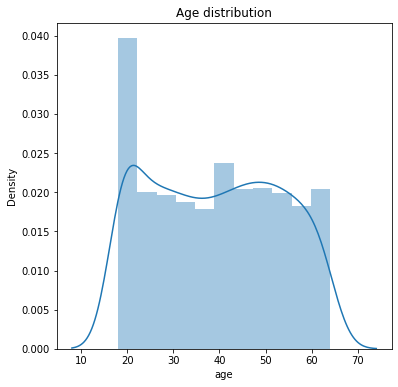

In [9]:
#distribution of age value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["age"])
plt.title("Age distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


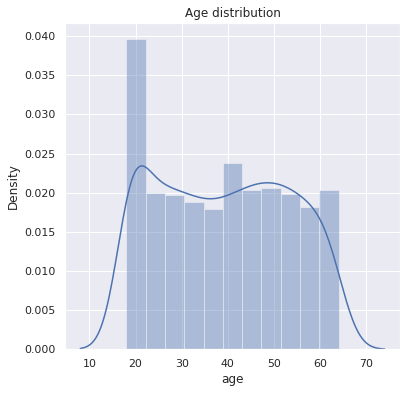

In [10]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["age"])
plt.title("Age distribution")
plt.show()

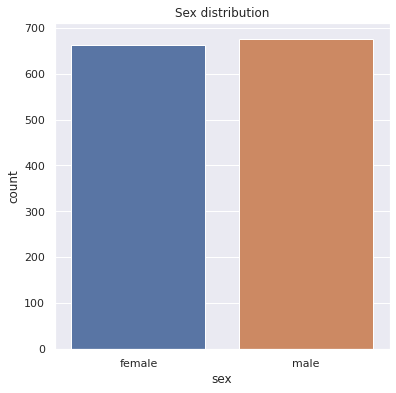

In [11]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title("Sex distribution")
plt.show()

In [12]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


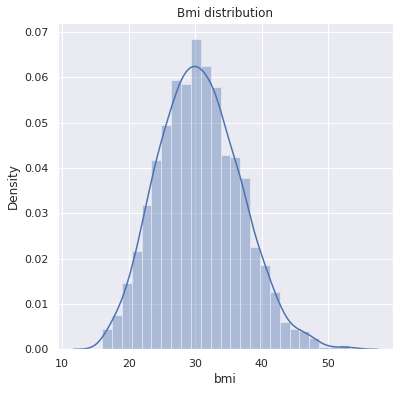

In [13]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["bmi"])
plt.title("Bmi distribution")
plt.show()

In [14]:
#normal BMI range= 18.5 to 24.9

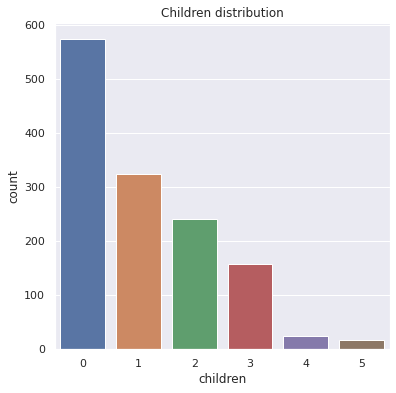

In [15]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance_dataset)
plt.title("Children distribution")
plt.show()

In [16]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

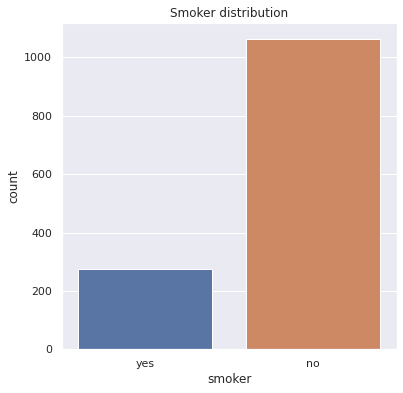

In [17]:
#smokercolumn
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=insurance_dataset)
plt.title("Smoker distribution")
plt.show()

In [18]:
insurance_dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

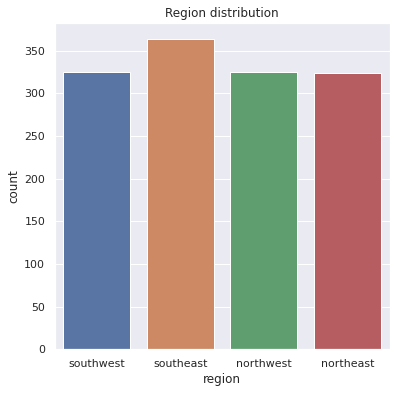

In [19]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=insurance_dataset)
plt.title("Region distribution")
plt.show()

In [20]:
insurance_dataset["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


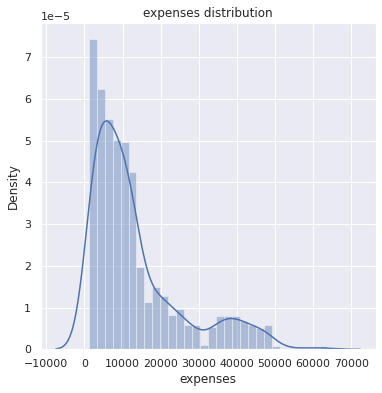

In [21]:
#distribution of expenses value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["expenses"])
plt.title("expenses distribution")
plt.show()

In [22]:
#Data processing

In [23]:
#Encoding the categorical features
#encoding sex column 
insurance_dataset.replace({"sex":{"male":0,"female":1}},inplace=True)
#encoding sex column 
insurance_dataset.replace({"smoker":{"yes":0,"no":1}},inplace=True)
#encoding region column 
insurance_dataset.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [24]:
#Splitting the features and target
x = insurance_dataset.drop(columns="expenses",axis=1)
y = insurance_dataset["expenses"]

In [25]:
print(x)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       0       1
1      18    0  33.8         1       1       0
2      28    0  33.0         3       1       0
3      33    0  22.7         0       1       3
4      32    0  28.9         0       1       3
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       1       3
1334   18    1  31.9         0       1       2
1335   18    1  36.9         0       1       0
1336   21    1  25.8         0       1       1
1337   61    1  29.1         0       0       3

[1338 rows x 6 columns]


In [26]:
#splitting the data into Training data and Testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [27]:
#model training
#loading the linear Regression model
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [28]:
#model evaluation
#prediction on training data 
training_data_prediction=regressor.predict(x_train)

In [29]:
#R square value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print("R squared value :",r2_train)

R squared value : 0.7515233180624387


In [30]:
#prediction on test data 
training_data_prediction=regressor.predict(x_test)

In [31]:
#R square value
r2_test=metrics.r2_score(y_test,training_data_prediction)
print("R squared value :",r2_test)

R squared value : 0.7447382074449773


In [32]:
#Building Predictive system
input_data=(31,1,25.74,0,1,0)

#changing the input_data to a numpy data
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The insurance cost in USD",prediction[0]) 

[3759.33603725]
The insurance cost in USD 3759.336037250352


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
